<a href="https://www.kaggle.com/code/harishkumardatalab/eda-of-multibrand-used-car-dataset?scriptVersionId=134579902" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-car-prediction-dataset/used_cars.csv


# Used car price analysis

**Problem Statement:**

A new car resale company aims to boost its sales and improve its market position. To achieve this, the company plans to leverage the power of data analysis and insights derived from a used car dataset. The objective is to identify key patterns, trends, and factors that influence the sales of used cars. The goal is to utilize the dataset to make informed decisions, maximize profitability, and gain a competitive edge in the used car market.

Note: This will not be a usual boring notebook. Car lover will enough this dataset more. Let's grab your hot cup of coffee to enjoy this detailed visual treat.

# 1. Importing Data and Libaries 

In [2]:
# Importing necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading the dataset
cars = pd.read_csv('/kaggle/input/used-car-prediction-dataset/used_cars.csv')
cars = cars.rename(columns={'mileage':'Odometer'})
cars.drop(['Unnamed: 0'],axis = 1, inplace=True)
cars.head()

,model,year,price,transmission,Odometer,fuelType,tax,mpg,engineSize,Make
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0,VW
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0,VW
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0,VW
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0,VW
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,VW


In [4]:
# Reading number of rows and columns
cars.shape

(99187, 10)

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99187 entries, 0 to 99186
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         99187 non-null  object 
 1   year          99187 non-null  int64  
 2   price         99187 non-null  int64  
 3   transmission  99187 non-null  object 
 4   Odometer      99187 non-null  int64  
 5   fuelType      99187 non-null  object 
 6   tax           99187 non-null  int64  
 7   mpg           99187 non-null  float64
 8   engineSize    99187 non-null  float64
 9   Make          99187 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.6+ MB


In [6]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
year,99187.0,2017.087723,2.123934,1970.0,2016.0,2017.0,2019.0,2060.0
price,99187.0,16805.347656,9866.773417,450.0,9999.0,14495.0,20870.0,159999.0
Odometer,99187.0,23058.914213,21148.523721,1.0,7425.0,17460.0,32339.0,323000.0
tax,99187.0,120.299838,63.150926,0.0,125.0,145.0,145.0,580.0
mpg,99187.0,55.166825,16.138522,0.3,47.1,54.3,62.8,470.8
engineSize,99187.0,1.663280,0.557646,0.0,1.2,1.6,2.0,6.6


# 2. Data pre-processing

In [7]:
# Missing value analysis
cars.isnull().sum()

model           0
year            0
price           0
transmission    0
Odometer        0
fuelType        0
tax             0
mpg             0
engineSize      0
Make            0
dtype: int64

In [8]:
# Viewing unique entities present in the columns
for i in cars.columns:
    print(i, ':', len(cars[i].unique()))

model : 195
year : 27
price : 13236
transmission : 4
Odometer : 42214
fuelType : 5
tax : 48
mpg : 208
engineSize : 40
Make : 9


In [9]:
# Analysis of years involved in the year column.
year = cars.year.unique()
year

array([2019, 2020, 2018, 2017, 2015, 2016, 2013, 2014, 2009, 2010, 2004,
       2003, 2012, 2011, 2008, 2000, 2006, 2002, 2005, 2007, 2001, 1997,
       1970, 1999, 1998, 1996, 2060])

In [10]:
# Analysing the car count distribution across the year
cars.year.value_counts()

2019    26771
2017    21733
2016    15850
2018    13664
2015     7645
2020     4465
2014     4085
2013     2603
2012      634
2011      432
2010      340
2009      278
2008      200
2007      163
2006       86
2005       69
2004       52
2003       34
2002       31
2001       20
2000        9
1998        8
1999        6
1997        4
1970        2
1996        2
2060        1
Name: year, dtype: int64

In [11]:
# I hope you got the outlier, the year "2060"
# Year 2060 is wrong value imputation
cars.drop(cars[cars.year==2060].index,inplace=True)
cars.year.unique()

array([2019, 2020, 2018, 2017, 2015, 2016, 2013, 2014, 2009, 2010, 2004,
       2003, 2012, 2011, 2008, 2000, 2006, 2002, 2005, 2007, 2001, 1997,
       1970, 1999, 1998, 1996])

In [12]:
# In the year 1970 only two entries and it acts as an outlier and hence we can drop it.
# We gen z/ millennials are not really interested in the old models which came far before our birth
cars.drop(cars[cars.year==1970].index,inplace=True)
cars.year.unique()

array([2019, 2020, 2018, 2017, 2015, 2016, 2013, 2014, 2009, 2010, 2004,
       2003, 2012, 2011, 2008, 2000, 2006, 2002, 2005, 2007, 2001, 1997,
       1999, 1998, 1996])

In [13]:
# Removed all the completely duplicated rows to ensure high accuracy and uniqueness of the dataset.
cars = cars.drop_duplicates()
cars.duplicated().sum()

0

# 3. EDA

In [14]:
# Reading the numerical and categorical featues
categorical_feactures = list(cars.select_dtypes("object").columns)
numerical_feactures = [ i for i in cars.columns if i not in categorical_feactures]
print(categorical_feactures)
print(numerical_feactures)

['model', 'transmission', 'fuelType', 'Make']
['year', 'price', 'Odometer', 'tax', 'mpg', 'engineSize']


In [15]:
# Sperating Numerical column names from the dataset
cars_num = cars.select_dtypes(['int64','float64'])
cars_num.columns

Index(['year', 'price', 'Odometer', 'tax', 'mpg', 'engineSize'], dtype='object')

In [16]:
# Separating Categorical column names from the dataset
cars_cat = cars.select_dtypes(['object'])
cars_cat.columns

Index(['model', 'transmission', 'fuelType', 'Make'], dtype='object')

In [17]:
# Kudos too!! Mercedes, Audi and BMW fans we are in the top three. 
# Predicting the mean of the car price sold by various brands. 
mp_make = cars.groupby('Make')['price'].mean().sort_values(ascending = False).round(2)
mp_make

Make
merc        24636.40
Audi        22853.96
BMW         22692.89
VW          16807.90
skoda       14284.80
hyundi      12727.81
toyota      12529.80
ford        12270.10
vauxhall    10314.25
Name: price, dtype: float64

In [18]:
# I still embrace that we have a few manual transmission lovers in the world give an Upvote.
# Predicting the mean price of the cars based on the transmission type.
mp_transmission = cars.groupby('transmission')['price'].mean().sort_values(ascending = False).round(2)
mp_transmission

transmission
Semi-Auto    24235.21
Automatic    21512.78
Other        16219.11
Manual       12076.64
Name: price, dtype: float64

In [19]:
# EV lovers know that you pay less with less pollution. Bad sign for torque lovers (Diesel).
# Predicting the mean price of the cars based on the fuel type.
mp_fueltype = cars.groupby('fuelType')['price'].mean().sort_values(ascending = False).round(2)
mp_fueltype

fuelType
Diesel      19306.73
Hybrid      19252.85
Other       17458.77
Electric    16645.33
Petrol      14733.24
Name: price, dtype: float64

In [20]:
# Let's find what are the features that acutally impact the price of the cars
# Analysing the correlation coefficient between the featues.
cars.corr()

,year,price,Odometer,tax,mpg,engineSize
year,1.000000,0.495111,-0.743478,0.193968,-0.131604,-0.036598
price,0.495111,1.000000,-0.417983,0.307023,-0.295518,0.639411
Odometer,-0.743478,-0.417983,1.000000,-0.215590,0.183088,0.107303
tax,0.193968,0.307023,-0.215590,1.000000,-0.451352,0.280902
mpg,-0.131604,-0.295518,0.183088,-0.451352,1.000000,-0.249398
engineSize,-0.036598,0.639411,0.107303,0.280902,-0.249398,1.000000


<Axes: >

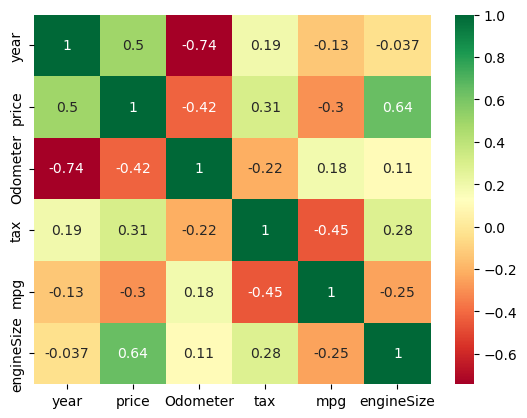

In [21]:
# Analysing the correlation between the features using heatmap
sns.heatmap(cars.corr(),annot=True,cmap='RdYlGn')

Insights
1. EngineSize, year, and tax are positively correlated to price.
* Older the car, less the value of car gets. New cars are highly priced
* Tax is directly proportional to price as various taxations are added to the price.
* Higher engine Size greater the power of the engine and tend to have higher price.
2. Negative Correlations are between mpg and tax, mileage and year.
* MPG(Milage per gallon) mostly differentiate between sports and regular cars, thus one with less MPG or sport cars are having high taxations and vice versa.
* Older the car is, more the mileage it has, as the car is travelled more.

#### Numerical Variable Analysis

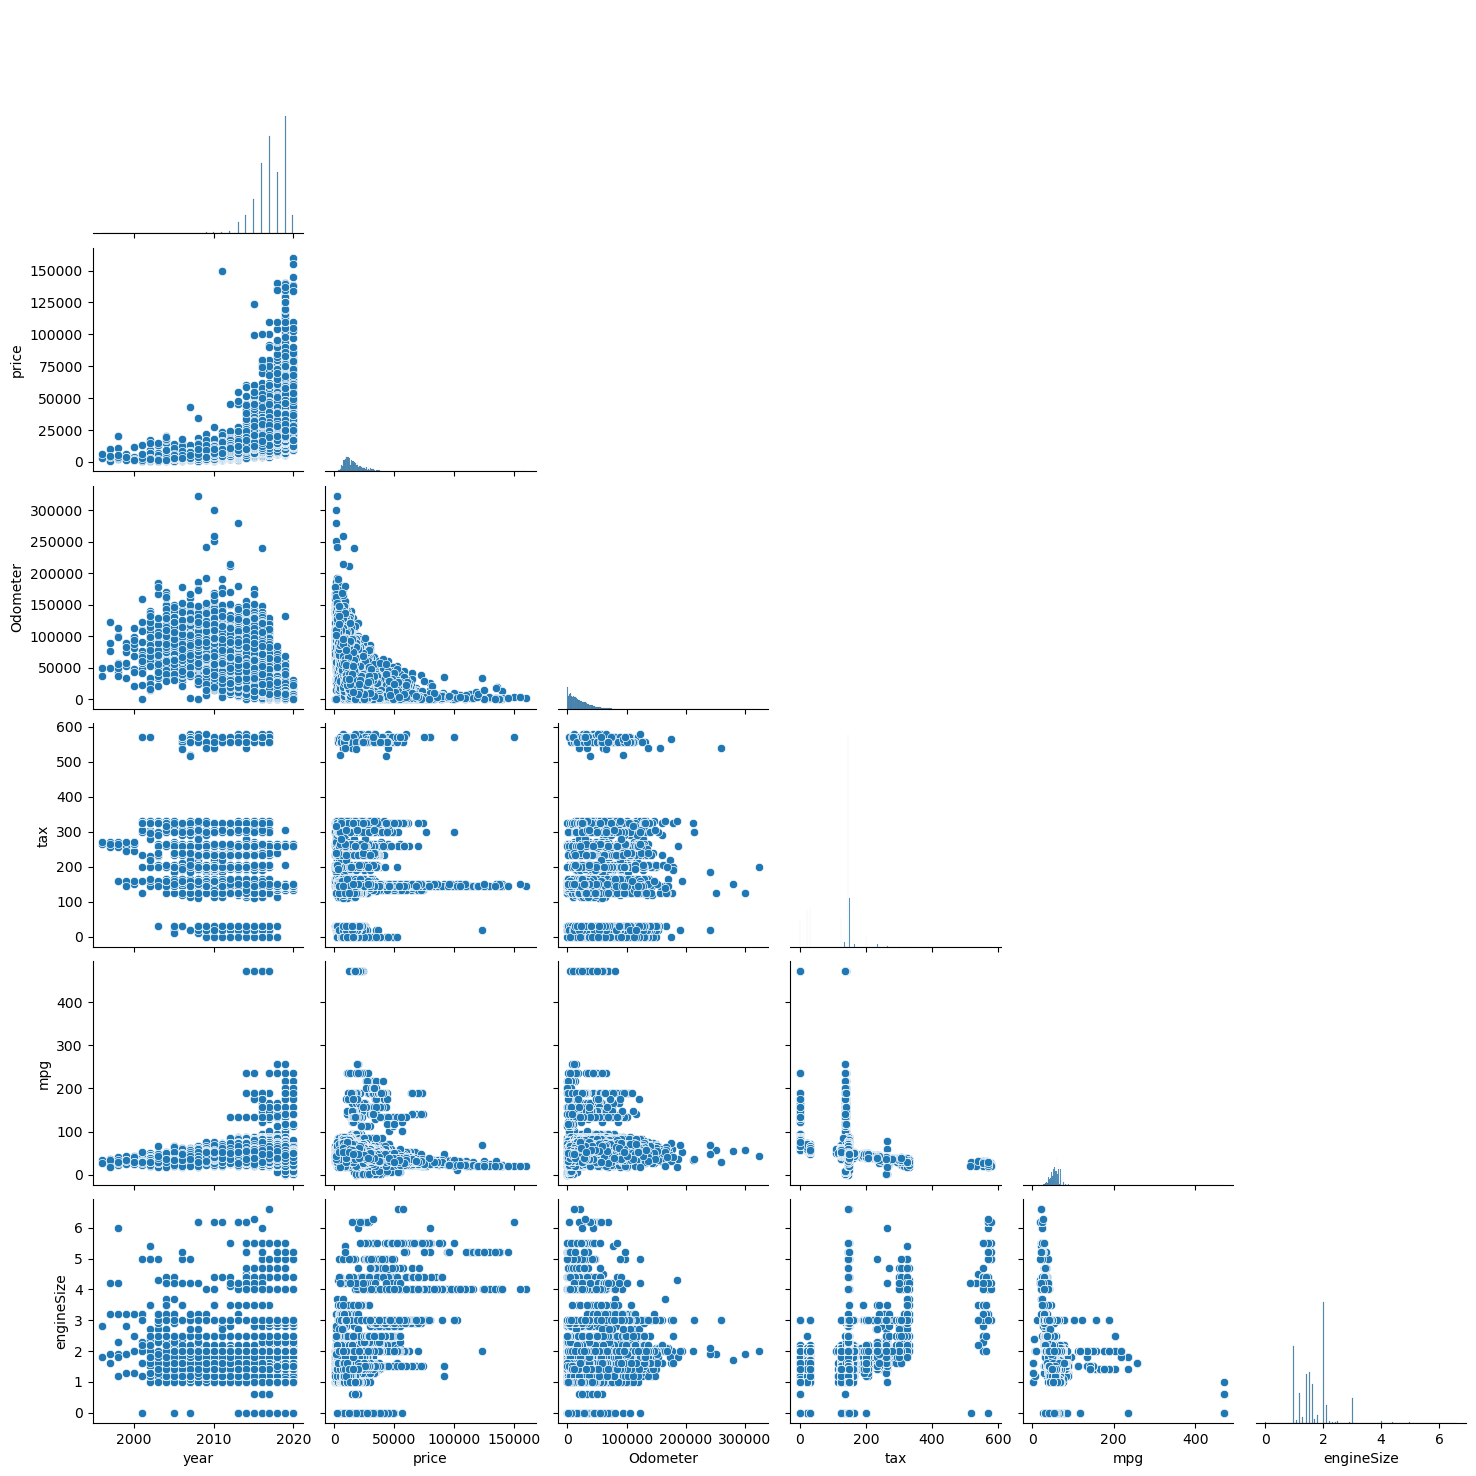

In [22]:
# Pair plot to analyses the relationship between the features present in the dataset.
# 
sns.pairplot(cars, corner = True)

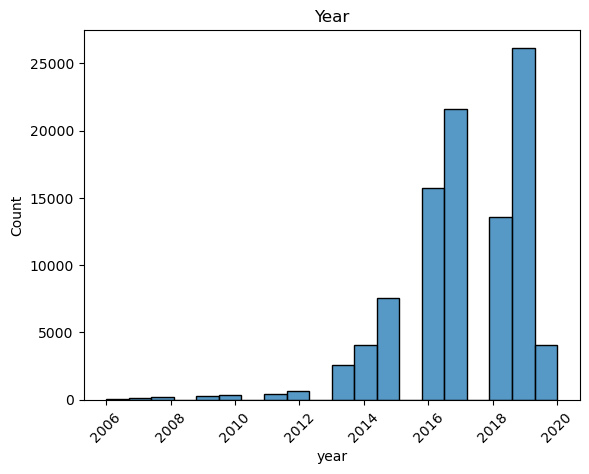

In [23]:
# We will cap the year from 1970 in order to make our model more relevant to real-time data.
# The car usage has increases rapidly in the last few years
sns.histplot(x="year", data=cars.query("year > 2005"), bins=20).set(title = "Year")
plt.xticks(rotation=45);

#### Categorical Variable Analysis

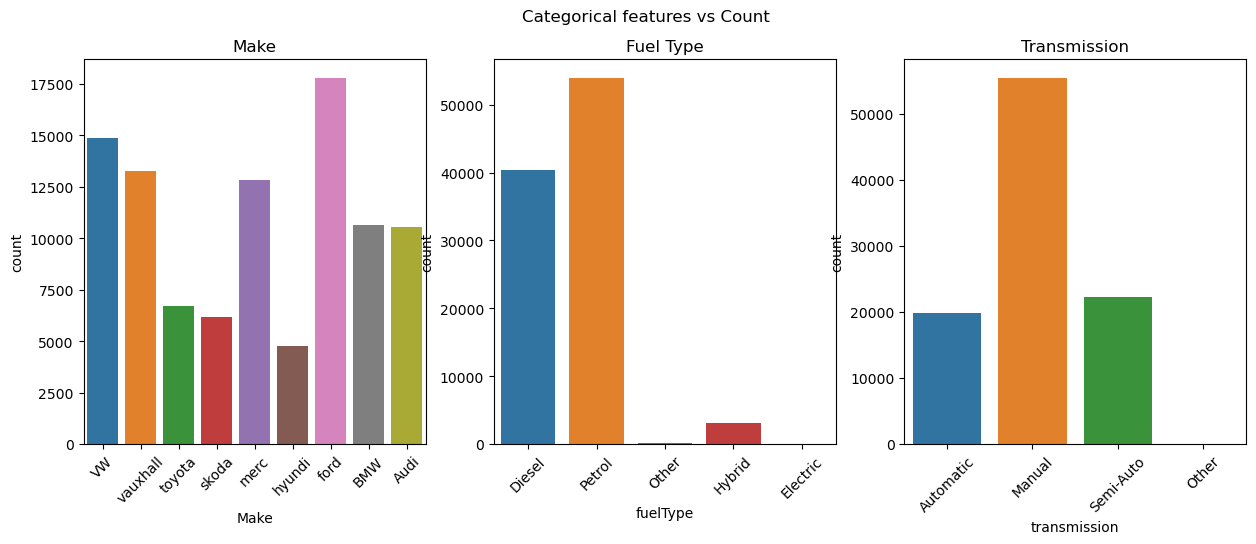

In [24]:
# Count plots for "Make", "Fuel type", "Transmission"
def plot_cat(df):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle('Categorical features vs Count')

    # Make
    sns.countplot(ax=axes[0], x="Make", data=cars)
    axes[0].set_title("Make")
    axes[0].tick_params(axis='x', rotation=45)

    # FuelType
    sns.countplot(ax=axes[1], x="fuelType", data=cars)
    axes[1].set_title("Fuel Type")
    axes[1].tick_params(axis='x', rotation=45)

    # Transmission
    sns.countplot(ax=axes[2], x="transmission", data=cars)
    axes[2].set_title("Transmission")
    axes[2].tick_params(axis='x', rotation=45)
plot_cat(cars)

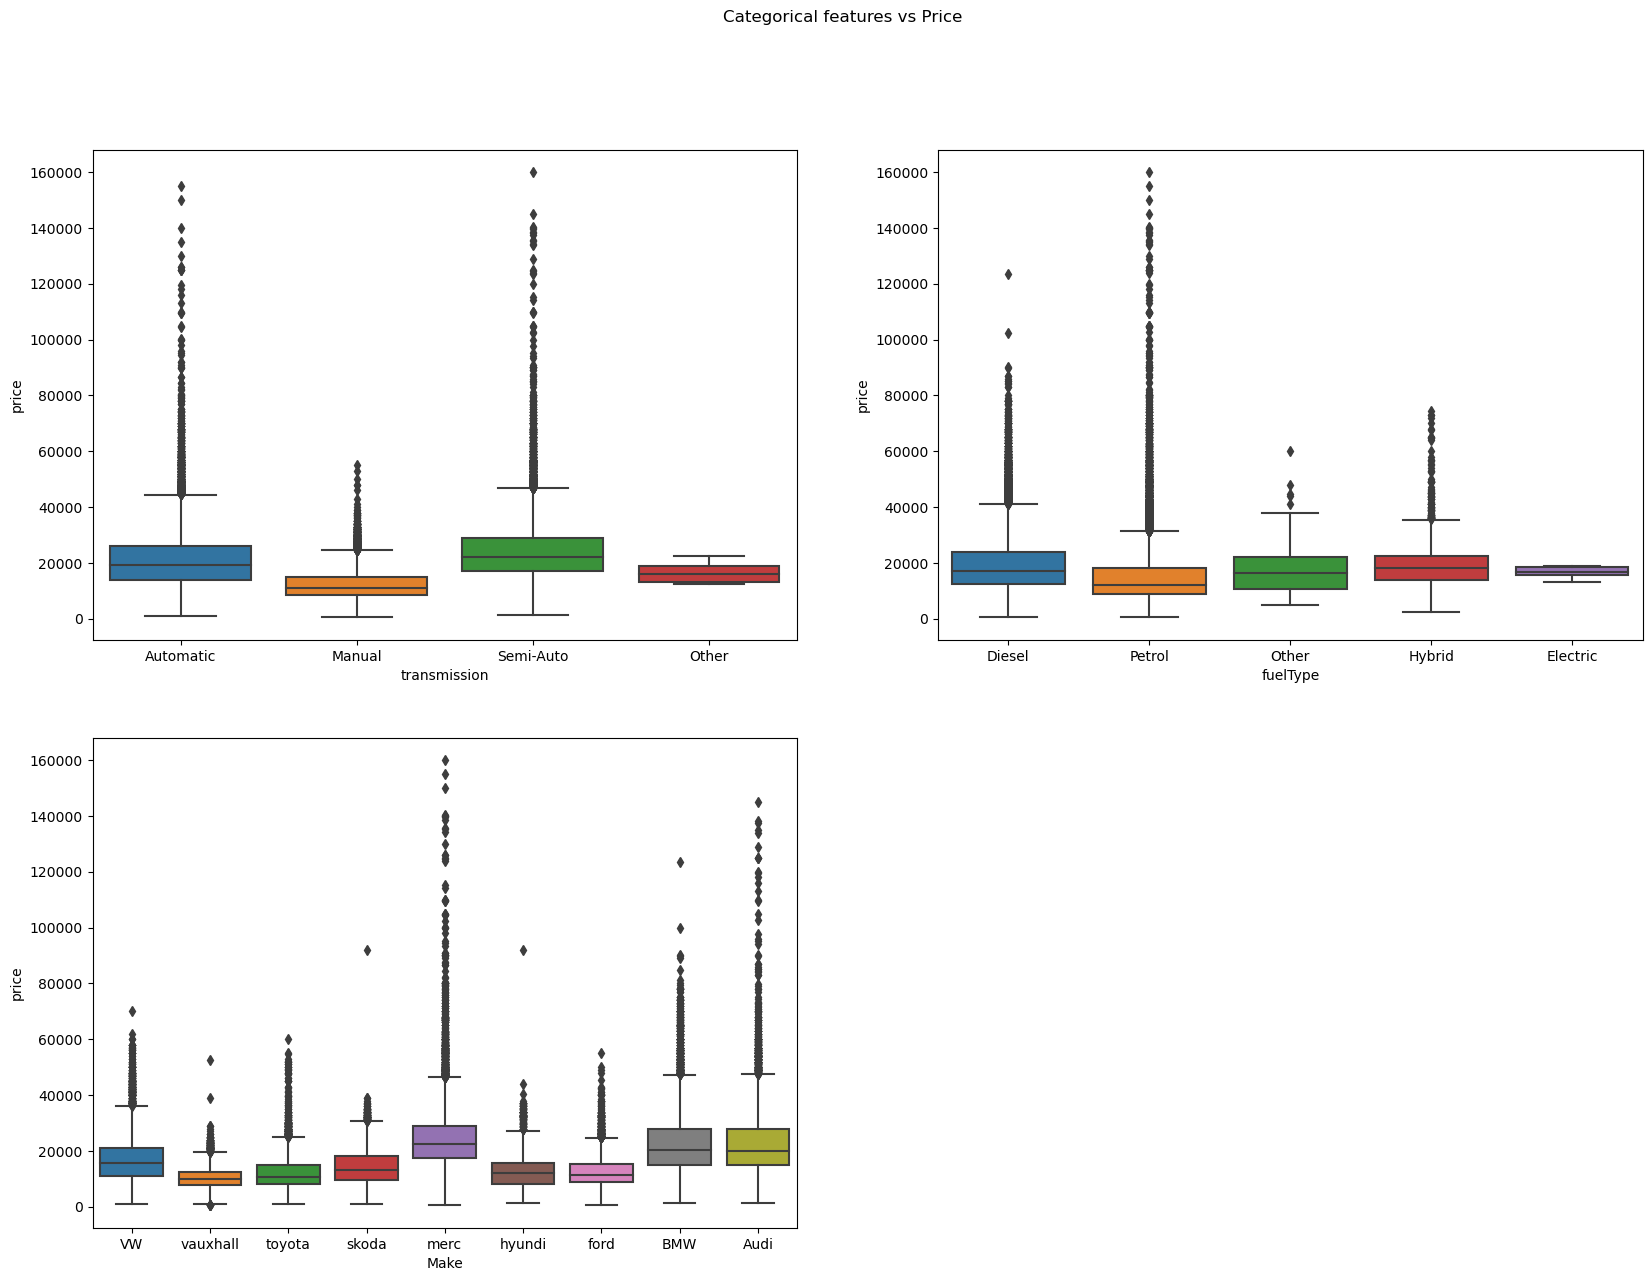

In [25]:
# Price distribustion of the cars based on transmission, fuel type and make
plt.figure(figsize=(20, 14))
plt.suptitle('Categorical features vs Price')
plt.subplot(2,2,1)
sns.boxplot(x = 'transmission', y = 'price', data = cars)
plt.subplot(2,2,2)
sns.boxplot(x = 'fuelType', y = 'price', data = cars)
plt.subplot(2,2,3)
sns.boxplot(x = 'Make', y = 'price', data = cars)
plt.show()

**Insights**
1. The price of automatic and semi-automic vehicle are high due to their demand in the market.
2. Price of BMW, Mercedes and Audi are in higher price bracket
2. Mercedes and Audi are dominanting in the luxury car manufacturing segment 

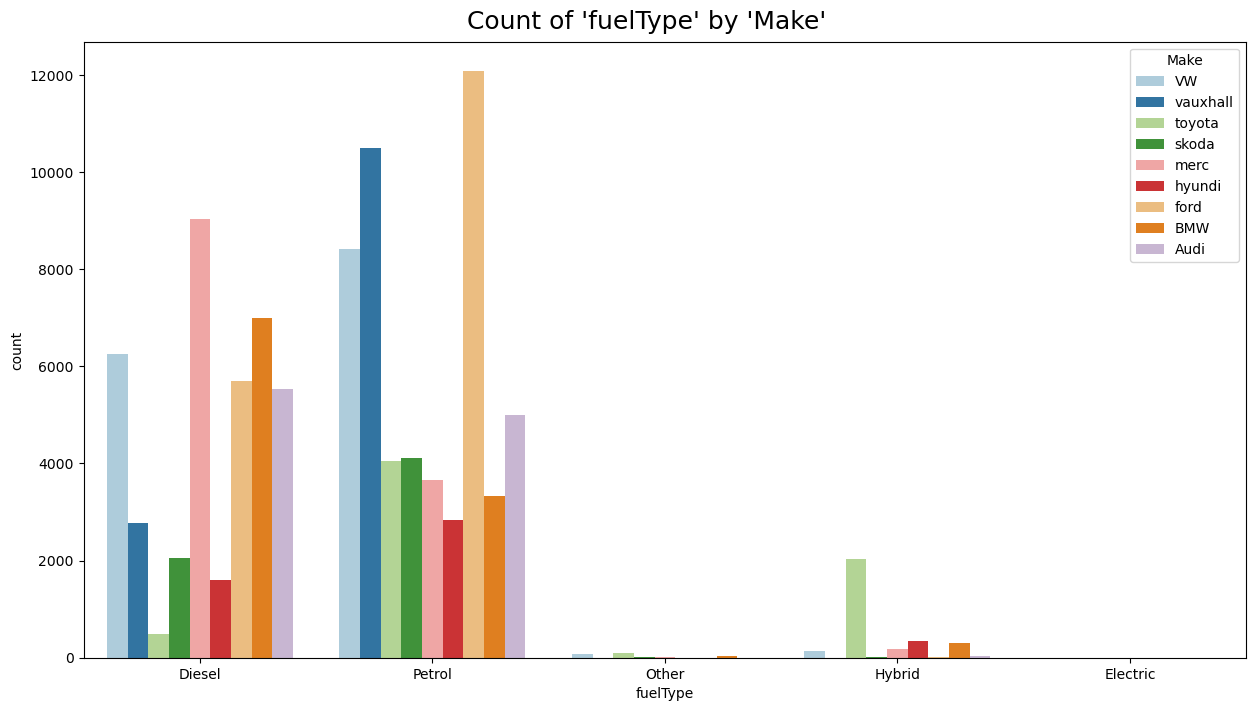

In [26]:
# Count of 'fuelType' by 'Make'
fig=plt.figure(figsize=(15,8))
plt.suptitle("Count of 'fuelType' by 'Make'", x=0.5 ,y=0.92, size=18)
sns.countplot(data=cars, x='fuelType', hue='Make', palette="Paired")
plt.show()

Insights 
1. Toyata is more instrested in the hybrid vehicle market compared to their competitors
2. Mercedes and BMW are showing major interest in the desiel vehicle
3. Ford and vauxhall are petrol dominators 

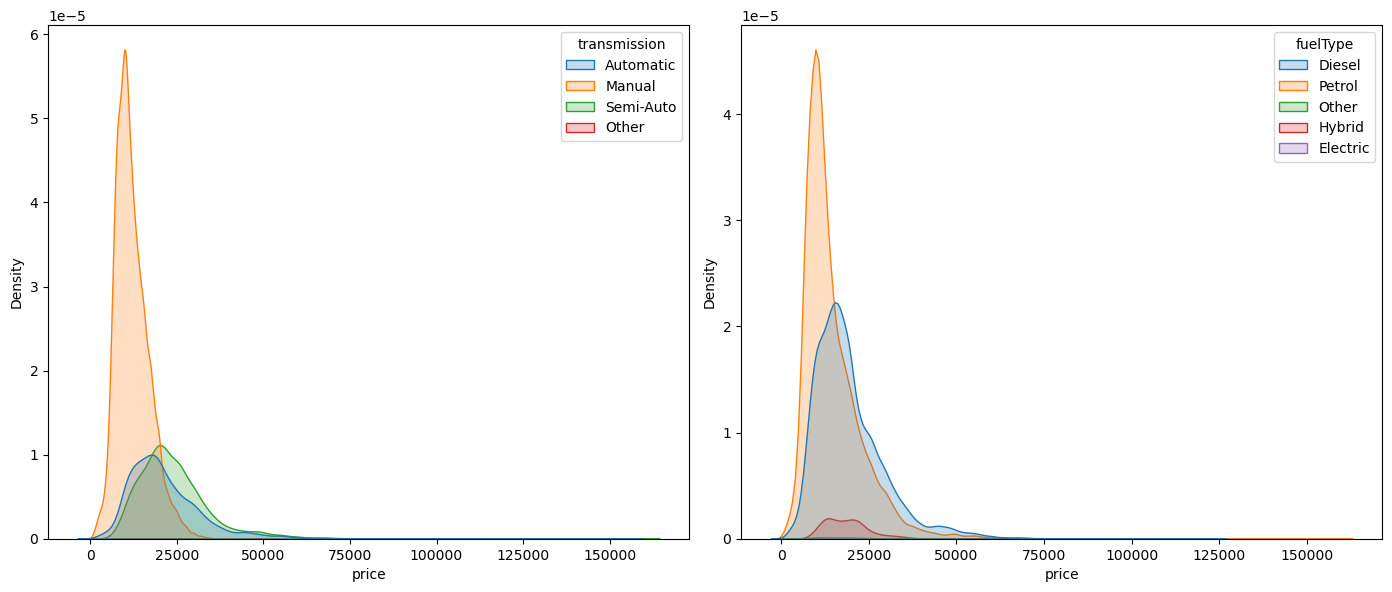

In [27]:
# Understand the price distribustion based on transmission and fueltype
fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.kdeplot(ax=ax[0], x='price', hue='transmission', data=cars, fill = True)
sns.kdeplot(ax=ax[1], x='price', hue='fuelType', data=cars, fill = True)

fig.tight_layout(pad=1)
plt.show()

**Insights**
* About transmission feature, manual transmission have higher density in lower price bracket, while auto and semi-auto have less density distribution at lower price bracker and a downwards density towards higher price range. This indicated the automatic and semi-automatic cars are sold are less in number because of their higher price bracket.
* Talking about fuelType, Petrol and Diesel are most dominant and quite overlapping. Petrol cars are sold the most because of multiple restriction/ban placed by the government on the usage of diesel engines.
* Hybrid has very few traces on the graph, so for better understanding we can look at the count which is just 28 compared to others falling in thousands.
* In conclusion, the customer-centric or budget cars with mannual transmission and petrol engines have higher counts while the luxury segment has lesser counts.

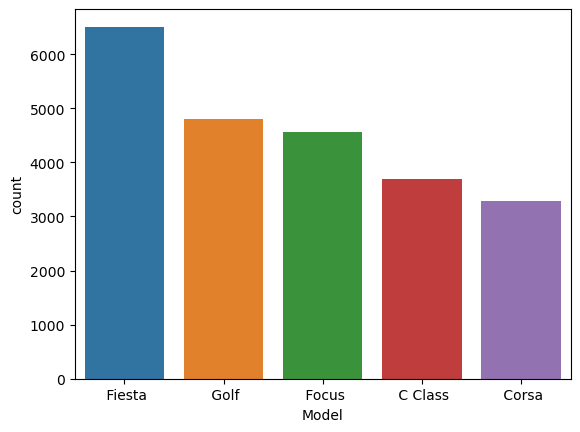

In [28]:
# Top 5 most sold car models
cars_model = cars.model.value_counts().head().reset_index()
cars_model.columns = ['Model','count']
sns.barplot(data=cars_model,x="Model",y="count")
plt.show()

# 4. Data Preparation

#### Data cleaning

In [29]:
cars.transmission.value_counts()

Manual       55501
Semi-Auto    22296
Automatic    19903
Other            9
Name: transmission, dtype: int64

In [30]:
# We will replace "other" with most frequent category(Mode) "Manual". Since "other" has only 9 rows in total.
cars['transmission'] = cars['transmission'].replace('Other','Manual')

In [31]:
cars.transmission.value_counts()

Manual       55510
Semi-Auto    22296
Automatic    19903
Name: transmission, dtype: int64

In [32]:
cars.fuelType.value_counts()

Petrol      53980
Diesel      40418
Hybrid       3059
Other         246
Electric        6
Name: fuelType, dtype: int64

In [33]:
# Since, we have less number of "Electric" vehicle.
# we will assign "Electric" fuelType with "Other" as it doesn't provide significant information to the model.
cars['fuelType'] = cars['fuelType'].replace('Electric', 'Other')
cars.fuelType.value_counts()

Petrol    53980
Diesel    40418
Hybrid     3059
Other       252
Name: fuelType, dtype: int64

#### Feature Engineering

In [34]:
categorical_feactures

['model', 'transmission', 'fuelType', 'Make']

In [35]:
# Conversion of categorical variables to numerical ones for model building process
# we will use label encoding method.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_feactures:
    cars[i] = le.fit_transform(cars[i])
cars.head()

,model,year,price,transmission,Odometer,fuelType,tax,mpg,engineSize,Make
0,153,2019,25000,0,13904,0,145,49.6,2.0,2
1,153,2019,26883,0,4562,0,145,49.6,2.0,2
2,153,2019,20000,1,7414,0,145,50.4,2.0,2
3,153,2019,33492,0,4825,3,145,32.5,2.0,2
4,153,2019,22900,2,6500,3,150,39.8,1.5,2


In [36]:
# We will convert all the categorical variables into dummies and drop the original variables since we are using one hot encoding
for i in categorical_feactures:
    dumm = pd.get_dummies(cars[i],prefix = str(i)+'_',dtype=int)
    cars = pd.concat([cars,dumm], axis=1)
cars.drop(categorical_feactures, axis=1, inplace=True)
cars.head()

,year,price,Odometer,tax,mpg,engineSize,model__0,model__1,model__2,model__3,...,fuelType__3,Make__0,Make__1,Make__2,Make__3,Make__4,Make__5,Make__6,Make__7,Make__8
0,2019,25000,13904,145,49.6,2.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2019,26883,4562,145,49.6,2.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2019,20000,7414,145,50.4,2.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2019,33492,4825,145,32.5,2.0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,2019,22900,6500,150,39.8,1.5,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [37]:
# Separating the feature and target variable
y = cars['price']
X = cars.drop('price',axis=1)
print(X.shape,y.shape)

(97709, 216) (97709,)


#### Standardisation

In [38]:
#  StandardScaler is applied on the numerical variable to bring all the features into a similar scale or distribution.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 5. Model Building

In [39]:
# Spliting the data into train(70%) and test(30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(68396, 216) (68396,)
(29313, 216) (29313,)


## i) Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,pred))
rs = model.score(X_test, y_test)
print("\n")
print("RMSE: ",rmse)
print("R-squared: ",rs)



RMSE:  6216035193901318.0
R-squared:  -4.036973231910211e+23


## ii) Ridge regression

In [41]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train,y_train)
pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,pred))
rs = model.score(X_test, y_test)
print("\n")
print("RMSE: ",rmse)
print("R-squared: ",rs)



RMSE:  3638.296570474979
R-squared:  0.8616990591875868


## iii) Lasso Regression

In [42]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train,y_train)
pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,pred))
rs = model.score(X_test, y_test)
print("\n")
print("RMSE: ",rmse)
print("R-squared: ",rs)



RMSE:  3637.9696301834983
R-squared:  0.8617239137410546


## iv) ElasticNet

In [43]:
from sklearn.linear_model import ElasticNet
model = ElasticNet()
model.fit(X_train,y_train)
pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,pred))
rs = model.score(X_test, y_test)
print("\n")
print("RMSE: ",rmse)
print("R-squared: ",rs)



RMSE:  4104.3202551687955
R-squared:  0.8240005048058813


## v) BayesianRidge

In [44]:
from sklearn.linear_model import BayesianRidge
model = BayesianRidge()
model.fit(X_train,y_train)
pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,pred))
rs = model.score(X_test, y_test)
print("\n")
print("RMSE: ",rmse)
print("R-squared: ",rs)



RMSE:  3638.0480723797514
R-squared:  0.861717950636391


## Ensemble Methods

## i) Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=123)
model.fit(X_train,y_train)
pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,pred))
rs = model.score(X_test, y_test)
print("\n")
print("RMSE: ",rmse)
print("R-squared: ",rs)



RMSE:  1941.1168162996723
R-squared:  0.9606330032523992


## ii) Gradient Boosting

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=123)
model.fit(X_train,y_train)
pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,pred))
rs = model.score(X_test, y_test)
print("\n")
print("RMSE: ",rmse)
print("R-squared: ",rs)



RMSE:  3098.839392940242
R-squared:  0.8996708629853177


## iii) Extreme Gradient Boosting

In [47]:
import xgboost as xgb
model = xgb.XGBRegressor(random_state=123)
model.fit(X_train,y_train)
pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,pred))
rs = model.score(X_test, y_test)
print("\n")
print("RMSE: ",rmse)
print("R-squared: ",rs)



RMSE:  2026.4523849548918
R-squared:  0.9570956084157858


## HAPPY MODEL BUILDING
## Thank You 